# Project Title - Email Classifier (spam/ham)
## Project link (original) - https://github.com/codebasics/py/tree/master/ML/14_naive_bayes
## Project link (Uploaded by me) - https://github.com/dev-abhi18/Spam-Classifier-
### Classifiers used Naive Bayes , KNN , Logistic Regression and Random Forest

#### Importing Neccessary Libraries

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


#### Importing the dataset and adding labels to it

In [2]:
df = pd.read_csv("./spam.csv")
df.head()
df['spam'] = df['Category'].apply(lambda x : 1 if x =='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [3]:
df.shape

(5572, 3)

#### Splitting the data into training and testing sets

In [4]:
X_train , X_Test , Y_train , Y_Test = train_test_split(df.Message , df.spam , test_size=0.33 , random_state=42)

#### Feature Extraction

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

X_train_count.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
print(X_train_count.toarray().shape)
model_Score =[]

(3733, 7081)


#### Training Naive Bayes Model


In [7]:
from sklearn.naive_bayes import MultinomialNB
algo1 = MultinomialNB()
algo1.fit(X_train_count, Y_train)


MultinomialNB()

In [8]:
emails = [
    'I HAVE A DATE ON SUNDAY WITH WILL!!' ,
    ',07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow'
]
emails_count = v.transform(emails)
algo1.predict(emails_count)

array([0, 1], dtype=int64)

In [9]:
X_Test_Count = v.transform(X_Test)
print(algo1.score(X_Test_Count , Y_Test) , algo1.score(X_train_count, Y_train))
model_Score.append(algo1.score(X_Test_Count , Y_Test))



0.9902120717781403 0.9930350924189659


In [10]:
print(X_Test.iloc[0])
print(algo1.predict(X_Test_Count[0]))

Squeeeeeze!! This is christmas hug.. If u lik my frndshp den hug me back.. If u get 3 u r cute:) 6 u r luvd:* 9 u r so lucky;) None? People hate u:
[0]


#### Training KNN

In [11]:
algo2  = KNeighborsClassifier(n_neighbors=1)
algo2.fit(X_train_count, Y_train)
algo2.score(X_Test_Count, Y_Test)
model_Score.append(algo2.score(X_Test_Count, Y_Test))

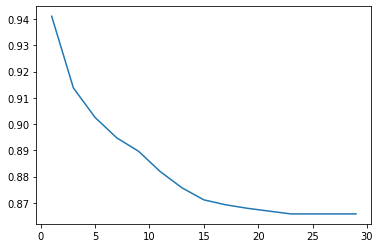

In [12]:
x_axis = []
y_axis = []
for i in range(1,30,2):
    algo2_1 = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score( algo2_1, X_train_count , Y_train)
    x_axis.append(i)
    y_axis.append(score.mean())
plt.plot(x_axis, y_axis)
plt.show()

In [13]:
print(X_Test.iloc[0])
print(algo2.predict(X_Test_Count[0]))

Squeeeeeze!! This is christmas hug.. If u lik my frndshp den hug me back.. If u get 3 u r cute:) 6 u r luvd:* 9 u r so lucky;) None? People hate u:
[0]


#### Training Logistic Regression

In [14]:
algo3  = LogisticRegression()
algo3.fit(X_train_count, Y_train)
algo3.score(X_Test_Count, Y_Test)
model_Score.append(algo3.score(X_Test_Count, Y_Test))

#### Training Random Forest

In [15]:
algo4 = RandomForestClassifier()
algo4.fit(X_train_count , Y_train)
algo4.score(X_Test_Count , Y_Test)

0.9787928221859706

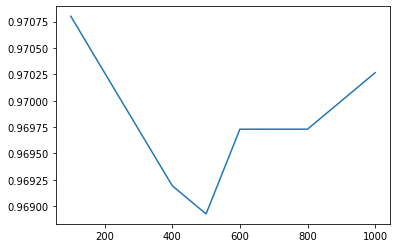

In [16]:
x_axis = []
y_axis = []
for i in range(100,1100,100):
    algo4_1 = RandomForestClassifier(n_estimators=i , random_state=42)
    score = cross_val_score( algo4_1, X_train_count , Y_train)
    x_axis.append(i)
    y_axis.append(score.mean())
plt.plot(x_axis, y_axis)
plt.show()

In [20]:
algo4_2 = RandomForestClassifier(n_estimators = 100)
algo4_2.fit(X_train_count , Y_train)
algo4_2.score(X_Test_Count , Y_Test)


0.9793365959760739

In [18]:
model_Score.append(algo4_2.score(X_Test_Count, Y_Test))

#### Conclusion

[0.9902120717781403, 0.9532354540511148, 0.9853181076672104, 0.9782490483958673]


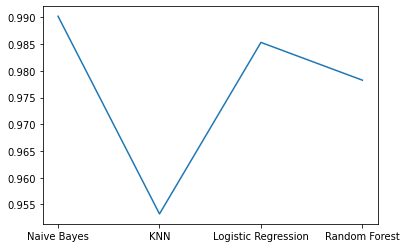

In [19]:
models = ["Naive Bayes" , "KNN" , "Logistic Regression" , "Random Forest" ]
print(model_Score)
plt.plot(models , model_Score )
plt.show()

####